In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import network_generation as homomul
import spread_simulation
import homophily_multi_attr_viz as viz
from tqdm.notebook import tqdm

# Reproduction: Social Origins of Networks and Diffusion

The paper titled "The Social Origins of Networks and Diffusion" by Centola (available at https://www.jstor.org/stable/10.1086/681275) delves into the relationship between consolidation and homophily. It argues that a certain level of homophily and consolidation is necessary to facilitate global cascades in social networks.

## Reproduction Model

The Idea is to see how the model proposed by Centola behaves with only two dimensions and attributes per dimension. To verify the implementation, the first experiment approximately reproduces the results found in figure 4. They explore the amount of consolidation and homophily necessary to result in a global cascade.

For implementation details see the paper.

In [ ]:
model_settings = {
    'N': 1600,
    'm': 5,
    'alpha': 1,
    'beta': 1,
    'complex_threshold': 0.18,
    'initial_seed_filter': lambda x: x.nodes,
    'model_type': 'social_origins_network'
}

experiment_settings = {
    'n_networks': 2,
    'n_initial_seeds': 5
    }


spread_simulation.batch_simulate(model_settings, experiment_settings)

## Affect on Social Diffiusion

Here we basically reproduce the plot in figure 4 in the paper. It is only half the nodes (to spead up the process) but as Zhao and Garip pointed out in their paper 'Network Diffusion Under Homophily and Consolidation as a Mechanism for Social Inequality', this is enough to reproduce the results. Furhtermore the original paper performed a complex spread where the absolut number of infected neighbouring nodes is used as a threshold rather than a relative number. Meaning that regardless of how many neighbours a node has, if two of its neighbours are infected, it gets infected.

We can basically see the same plot as both previously mentioned papers.



  0%|          | 0/100 [00:00<?, ?it/s]

alpha: -1.00 / beta: -1.00 => avg = 0.11; global = 0.10
alpha: -1.00 / beta: -0.56 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: -0.11 => avg = 0.60; global = 0.60
alpha: -1.00 / beta: 0.33 => avg = 0.31; global = 0.30
alpha: -1.00 / beta: 0.78 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: 1.22 => avg = 0.11; global = 0.10
alpha: -1.00 / beta: 1.67 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: 2.11 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: 2.56 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: 3.00 => avg = 0.01; global = 0.00
alpha: -0.56 / beta: -1.00 => avg = 0.11; global = 0.10
alpha: -0.56 / beta: -0.56 => avg = 0.01; global = 0.00
alpha: -0.56 / beta: -0.11 => avg = 0.31; global = 0.30
alpha: -0.56 / beta: 0.33 => avg = 0.01; global = 0.00
alpha: -0.56 / beta: 0.78 => avg = 0.01; global = 0.00
alpha: -0.56 / beta: 1.22 => avg = 0.11; global = 0.10
alpha: -0.56 / beta: 1.67 => avg = 0.01; global = 0.00
alpha: -0.56 / beta: 2.11 => avg = 0.01; global = 0.00
alph

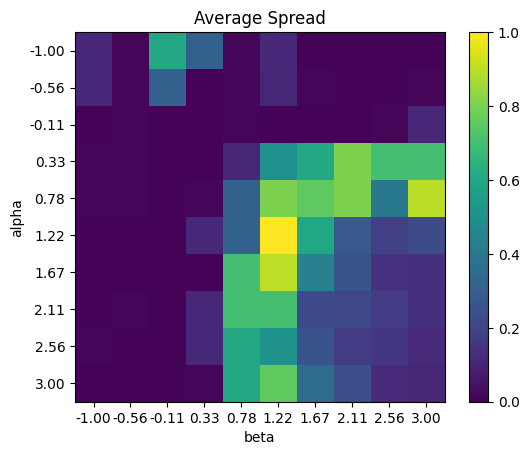

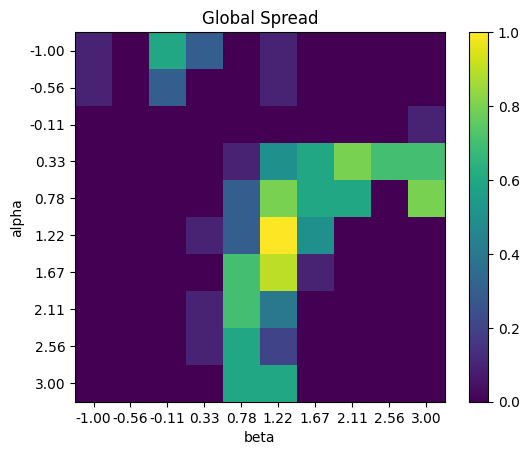

In [ ]:
alpha_settings = np.linspace(-1,3,10)
beta_settings = np.linspace(-1,3,10)

results_average, results_global_spread = spread_simulation.setting_simulate('alpha', alpha_settings,
                                                          'beta', beta_settings,
                                                          model_settings, experiment_settings)


## Reducing
What happens if we reduce it two two dimension with two attributes?

In [ ]:
model_settings = {
    'N': 1600,
    'm': 5,
    'H': 2,
    'D': 2,
    'alpha': 1,
    'beta': 1,
    'complex_threshold': 0.16,
    'initial_seed_filter': lambda x: x.nodes,
    'model_type': 'social_origins_network'
}

spread_simulation.batch_simulate(model_settings, experiment_settings)

(0.31012500000000004, 0.3)

  0%|          | 0/100 [00:00<?, ?it/s]

alpha: -1.00 / beta: -1.00 => avg = 0.51; global = 0.50
alpha: -1.00 / beta: -0.56 => avg = 0.41; global = 0.40
alpha: -1.00 / beta: -0.11 => avg = 0.21; global = 0.20
alpha: -1.00 / beta: 0.33 => avg = 0.51; global = 0.50
alpha: -1.00 / beta: 0.78 => avg = 0.41; global = 0.40
alpha: -1.00 / beta: 1.22 => avg = 0.41; global = 0.40
alpha: -1.00 / beta: 1.67 => avg = 0.61; global = 0.60
alpha: -1.00 / beta: 2.11 => avg = 0.11; global = 0.10
alpha: -1.00 / beta: 2.56 => avg = 0.31; global = 0.30
alpha: -1.00 / beta: 3.00 => avg = 0.21; global = 0.20
alpha: -0.56 / beta: -1.00 => avg = 0.51; global = 0.50
alpha: -0.56 / beta: -0.56 => avg = 0.70; global = 0.70
alpha: -0.56 / beta: -0.11 => avg = 0.51; global = 0.50
alpha: -0.56 / beta: 0.33 => avg = 0.21; global = 0.20
alpha: -0.56 / beta: 0.78 => avg = 0.31; global = 0.30
alpha: -0.56 / beta: 1.22 => avg = 0.41; global = 0.40
alpha: -0.56 / beta: 1.67 => avg = 0.11; global = 0.10
alpha: -0.56 / beta: 2.11 => avg = 0.41; global = 0.40
alph

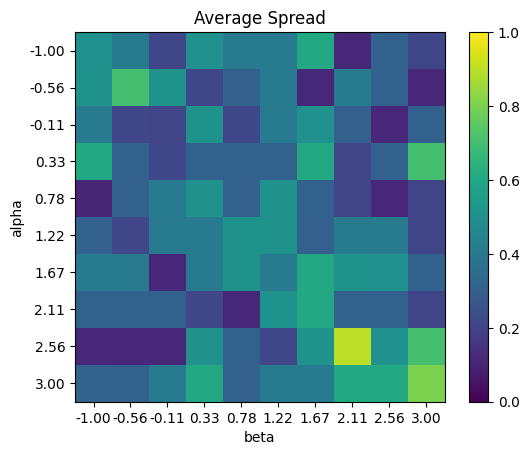

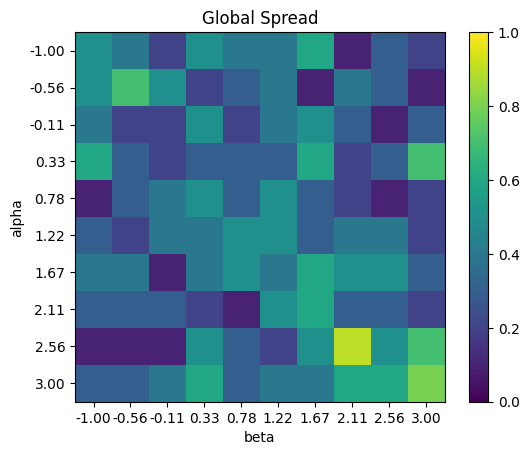

In [ ]:
alpha_settings = np.linspace(-1,3,10)
beta_settings = np.linspace(-1,3,10)

results_average, results_global_spread = spread_simulation.setting_simulate('alpha', alpha_settings,
                                                          'beta', beta_settings,
                                                          model_settings, experiment_settings)

In [ ]:
model_settings = {
    'N': 800,
    'm': 5,
    'H': 2,
    'D': 2,
    'alpha': 1,
    'beta': 1,
    'complex_threshold': 0.18,
    'initial_seed_filter': lambda x: x.nodes,
    'model_type': 'social_origins_network'
}

spread_simulation.batch_simulate(model_settings, experiment_settings)

(0.4065625, 0.4)

  0%|          | 0/100 [00:00<?, ?it/s]

alpha: -1.00 / beta: -1.00 => avg = 0.31; global = 0.30
alpha: -1.00 / beta: -0.56 => avg = 0.22; global = 0.20
alpha: -1.00 / beta: -0.11 => avg = 0.51; global = 0.50
alpha: -1.00 / beta: 0.33 => avg = 0.71; global = 0.70
alpha: -1.00 / beta: 0.78 => avg = 0.52; global = 0.50
alpha: -1.00 / beta: 1.22 => avg = 0.31; global = 0.30
alpha: -1.00 / beta: 1.67 => avg = 0.31; global = 0.30
alpha: -1.00 / beta: 2.11 => avg = 0.32; global = 0.30
alpha: -1.00 / beta: 2.56 => avg = 0.22; global = 0.20
alpha: -1.00 / beta: 3.00 => avg = 0.41; global = 0.40
alpha: -0.56 / beta: -1.00 => avg = 0.51; global = 0.50
alpha: -0.56 / beta: -0.56 => avg = 0.31; global = 0.30
alpha: -0.56 / beta: -0.11 => avg = 0.51; global = 0.50
alpha: -0.56 / beta: 0.33 => avg = 0.32; global = 0.30
alpha: -0.56 / beta: 0.78 => avg = 0.42; global = 0.40
alpha: -0.56 / beta: 1.22 => avg = 0.22; global = 0.20
alpha: -0.56 / beta: 1.67 => avg = 0.51; global = 0.50
alpha: -0.56 / beta: 2.11 => avg = 0.61; global = 0.60
alph

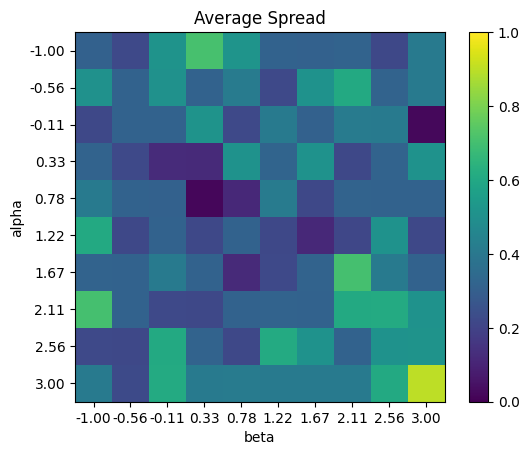

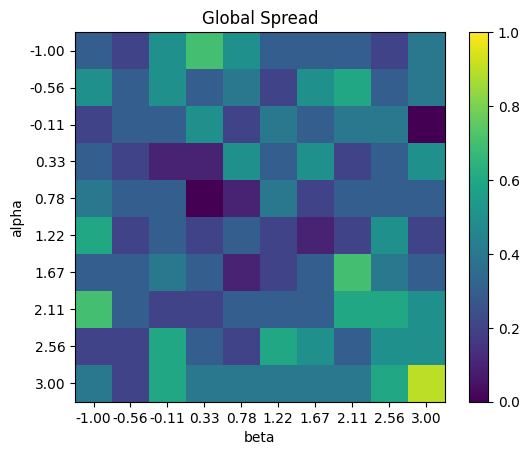

In [ ]:
alpha_settings = np.linspace(-1,3,10)
beta_settings = np.linspace(-1,3,10)

results_average, results_global_spread = spread_simulation.setting_simulate('alpha', alpha_settings,
                                                          'beta', beta_settings,
                                                          model_settings, experiment_settings)

## Exploring Diffusion and Homophily

In [ ]:
import network_stats

model_settings = {
    'N': 1600,
    'm': 5,
    'H': 2,
    'D': 2,
    'alpha': 3,
    'beta': 1,
    'complex_threshold': 0.16,
    'initial_seed_filter': lambda x: x.nodes,
    'model_type': 'social_origins_network'
}

g = homomul.social_origins_network(**model_settings)

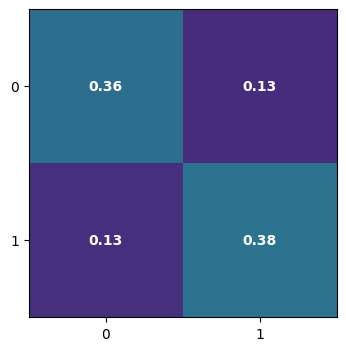

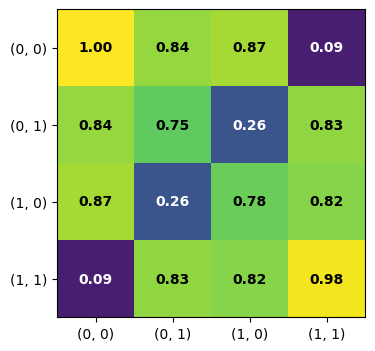

array([[1.        , 0.84040465, 0.86557701, 0.08541481],
       [0.84040465, 0.75453921, 0.26454998, 0.83409704],
       [0.86557701, 0.26454998, 0.77507271, 0.81867382],
       [0.08541481, 0.83409704, 0.81867382, 0.98238544]])

In [ ]:
network_stats.marginal_matrix(g)
network_stats.homophily_matrix(g)

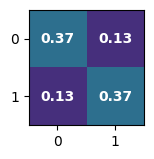

In [ ]:
# analytical solution
a = model_settings['alpha']
b = model_settings['beta']

marginal_matrix = np.array([[1, np.exp(-b)],
                            [np.exp(-b), 1]]).reshape(2, 2)
marginal_matrix = marginal_matrix / marginal_matrix.sum()

viz.fig_colored_matrix(
            marginal_matrix,
            xticks=range(2),
            yticks=range(2),
            show_colorbar=False,
            figsize=None,
            vmin=0)
plt.show()

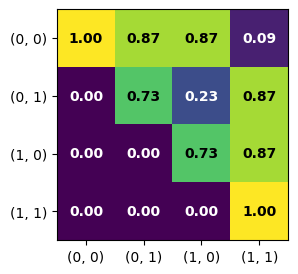

In [ ]:
import itertools

h_matrix = np.zeros((4, 4))
d1 = 1
d2 = np.exp(-a) * d1

m = marginal_matrix

h_matrix[0, 0] = d1 * 1/(m[0,0] + m[1, 0] + m[0,1]) * 2
h_matrix[0, 1] = h_matrix[0, 2] = d1 * (1/(m[0,0] + m[1, 0] + m[0,1]) + 1/(m[1,1] + m[0,1] + m[0,0]))
h_matrix[0, 3] = d2 / m[0,0] * 2

h_matrix[1, 1] = d1 * 1/(m[0,0] + m[1, 0] + m[1,1]) * 2
h_matrix[1, 2] = d2 / m[1,0] * 2
h_matrix[1, 3] = d1 * (1/(m[0,0] + m[1, 0] + m[1,1]) + 1/(m[1,1] + m[0,1] + m[1,0]))

h_matrix[2, 2] = d1 * 1/(m[1,1] + m[1,0] + m[0,0]) * 2
h_matrix[2, 3] = d1 * (1/(m[1,1] + m[1,0] + m[0,0]) + 1/(m[1,1] + m[0,1] + m[1,0]))

h_matrix[3, 3] = d1 * 1/(m[1,1] + m[0,1] + m[1,0]) * 2

h_matrix = h_matrix / h_matrix.max()


viz.fig_colored_matrix(
            h_matrix,
            xticks=itertools.product(range(2), repeat=2),
            yticks=itertools.product(range(2), repeat=2),
            show_colorbar=False,
            figsize=None,
            vmin=0)
plt.show()

## Changing Homophily Dimension Aggregation

Currently, the homophily aggregation considers min distance accross all dimension. Our other model uses homophily in all-dimension which is considerably different. Therefore I changed the Link-generation to include a function to change homophily aggregation.

**Max Distance within all dimensions**

In [ ]:
model_settings = {
    'N': 1600,
    'm': 5,
    'alpha': 1,
    'beta': 1,
    'complex_threshold': 0.18,
    'initial_seed_filter': lambda x: x.nodes,
    'model_type': 'social_origins_network',
    'dimension_aggrigation': max
}


experiment_settings = {
    'n_networks': 2,
    'n_initial_seeds': 5
    }

  0%|          | 0/100 [00:00<?, ?it/s]

alpha: -1.00 / beta: -1.00 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: -0.56 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: -0.11 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: 0.33 => avg = 0.11; global = 0.10
alpha: -1.00 / beta: 0.78 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: 1.22 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: 1.67 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: 2.11 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: 2.56 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: 3.00 => avg = 0.01; global = 0.00
alpha: -0.56 / beta: -1.00 => avg = 0.01; global = 0.00
alpha: -0.56 / beta: -0.56 => avg = 0.01; global = 0.00
alpha: -0.56 / beta: -0.11 => avg = 0.11; global = 0.10
alpha: -0.56 / beta: 0.33 => avg = 0.01; global = 0.00
alpha: -0.56 / beta: 0.78 => avg = 0.01; global = 0.00
alpha: -0.56 / beta: 1.22 => avg = 0.01; global = 0.00
alpha: -0.56 / beta: 1.67 => avg = 0.01; global = 0.00
alpha: -0.56 / beta: 2.11 => avg = 0.01; global = 0.00
alph

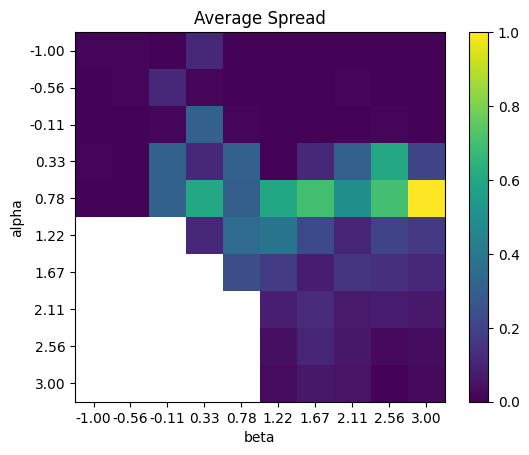

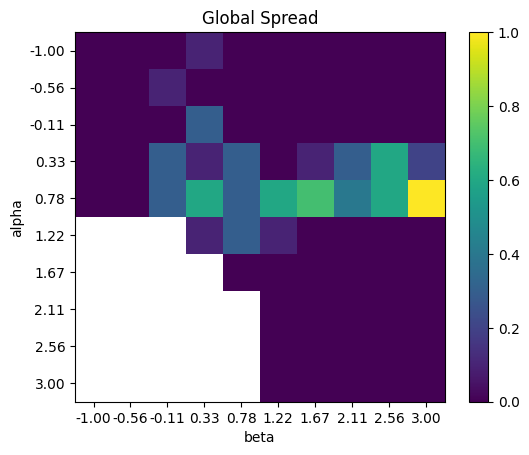

In [ ]:
alpha_settings = np.linspace(-1,3,10)
beta_settings = np.linspace(-1,3,10)

results_average, results_global_spread = spread_simulation.setting_simulate('alpha', alpha_settings,
                                                          'beta', beta_settings,
                                                          model_settings, experiment_settings)

In [49]:
model_settings = {
    'N': 1600,
    'm': 5,
    'H': 2,
    'D': 2,
    'alpha': 0.5,
    'beta': 0.5,
    'complex_threshold': 0.18,
    'initial_seed_filter': lambda x: x.nodes,
    'model_type': 'social_origins_network',
    'dimension_aggrigation': max
}

  0%|          | 0/100 [00:00<?, ?it/s]

alpha: -1.00 / beta: -1.00 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: -0.56 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: -0.11 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: 0.33 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: 0.78 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: 1.22 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: 1.67 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: 2.11 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: 2.56 => avg = 0.01; global = 0.00
alpha: -1.00 / beta: 3.00 => avg = 0.01; global = 0.00
alpha: -0.56 / beta: -1.00 => avg = 0.01; global = 0.00
alpha: -0.56 / beta: -0.56 => avg = 0.01; global = 0.00
alpha: -0.56 / beta: -0.11 => avg = 0.01; global = 0.00
alpha: -0.56 / beta: 0.33 => avg = 0.01; global = 0.00
alpha: -0.56 / beta: 0.78 => avg = 0.01; global = 0.00
alpha: -0.56 / beta: 1.22 => avg = 0.01; global = 0.00
alpha: -0.56 / beta: 1.67 => avg = 0.01; global = 0.00
alpha: -0.56 / beta: 2.11 => avg = 0.11; global = 0.10
alph

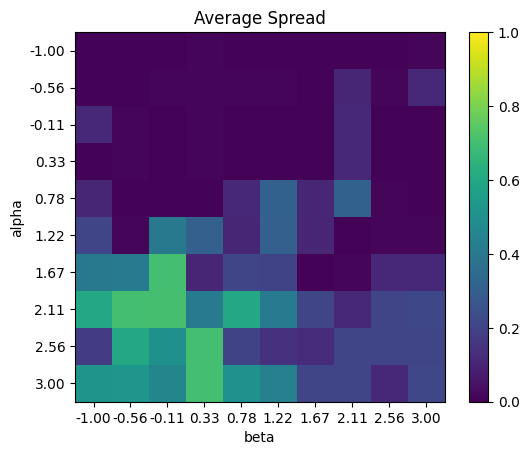

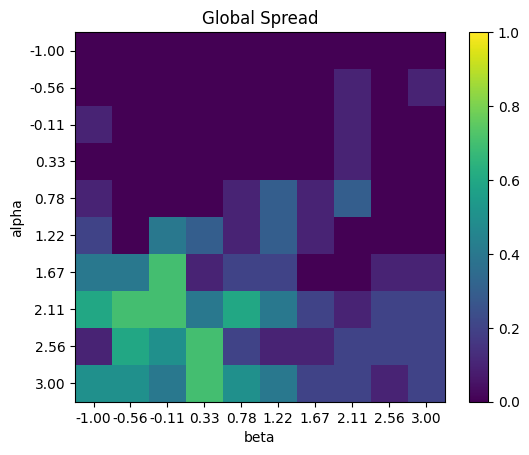

In [ ]:
alpha_settings = np.linspace(-1,3,10)
beta_settings = np.linspace(-1,3,10)

results_average, results_global_spread = spread_simulation.setting_simulate('alpha', alpha_settings,
                                                          'beta', beta_settings,
                                                          model_settings, experiment_settings)

### How does the Homophily matrix look like?

In [50]:
g = homomul.social_origins_network(**model_settings)

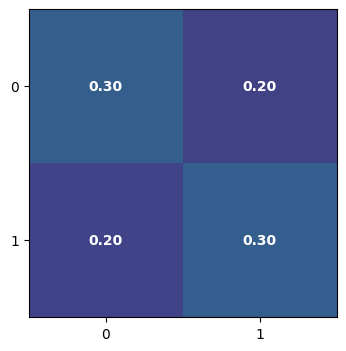

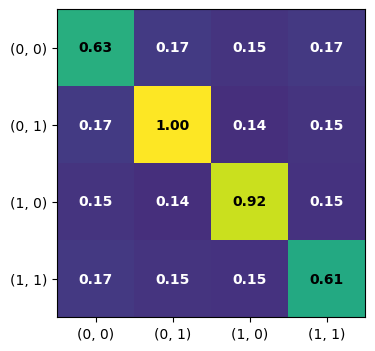

array([[0.62795329, 0.17004453, 0.149394  , 0.16556146],
       [0.17004453, 1.        , 0.13602968, 0.15175072],
       [0.149394  , 0.13602968, 0.92034082, 0.14597751],
       [0.16556146, 0.15175072, 0.14597751, 0.60713521]])

In [51]:
import network_stats
network_stats.marginal_matrix(g)
network_stats.homophily_matrix(g)

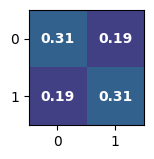

In [52]:
# analytical solution
a = model_settings['alpha']
b = model_settings['beta']

marginal_matrix = np.array([[1, np.exp(-b)],
                            [np.exp(-b), 1]]).reshape(2, 2)
marginal_matrix = marginal_matrix / marginal_matrix.sum()

viz.fig_colored_matrix(
            marginal_matrix,
            xticks=range(2),
            yticks=range(2),
            show_colorbar=False,
            figsize=None,
            vmin=0)
plt.show()

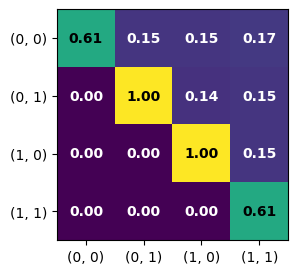

In [54]:
h_matrix = np.zeros((4, 4))
d1 = 1
d2 = np.exp(-a) * d1

m = marginal_matrix

h_matrix[0, 0] = d1 * 2 / m[0,0]
h_matrix[0, 1] = h_matrix[0, 2] = d2 * (1/(m[0,0] + m[1, 0] + m[0,1]) + 1/(m[1,1] + m[0,1] + m[0,0]))
h_matrix[0, 3] = d2 * 1/(m[1, 1] + m[1, 0] + m[0, 1]) * 2

h_matrix[1, 1] = d1 * 1/(m[0,1]) * 2
h_matrix[1, 2] = d2 * 1/(m[0,1] + m[0,0] + m[1,1])* 2
h_matrix[1, 3] = h_matrix[0,1]

h_matrix[2, 2] = h_matrix[1,1]
h_matrix[2, 3] = h_matrix[0,1]

h_matrix[3, 3] = h_matrix[0,0]

h_matrix = h_matrix / h_matrix.max()


viz.fig_colored_matrix(
            h_matrix,
            xticks=itertools.product(range(2), repeat=2),
            yticks=itertools.product(range(2), repeat=2),
            show_colorbar=False,
            figsize=None,
            vmin=0)
plt.show()